In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2 as cv

In [4]:
import cv2 as cv

img_path = '../output_videos/cropped_img.jpg'  # Use forward slash for compatibility
img = cv.imread(img_path)

if img is not None:
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
else:
    print("Error: Image not found or cannot be loaded.")

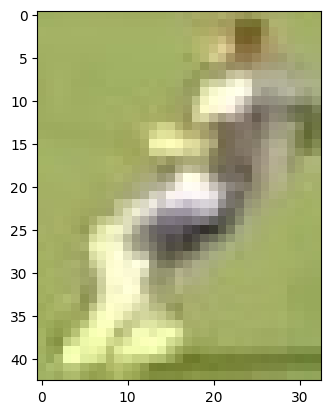

In [5]:
plt.imshow(img)
plt.show()

In [6]:
img.shape

(43, 33, 3)

### Getting the top half of image

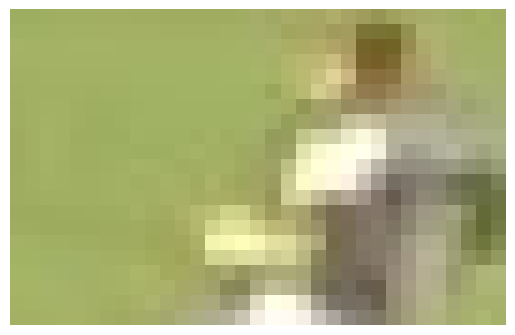

In [7]:
top_half_img = img[0:int(img.shape[0]/2),:]
plt.imshow(top_half_img)
plt.axis('off')
plt.show();

#### Clustering the Image into two clusters 

In [8]:
# Resize the image to 2D shape
img_2d = top_half_img.reshape(-1,3)
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(img_2d)

KMeans(n_clusters=2, random_state=42)

In [9]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

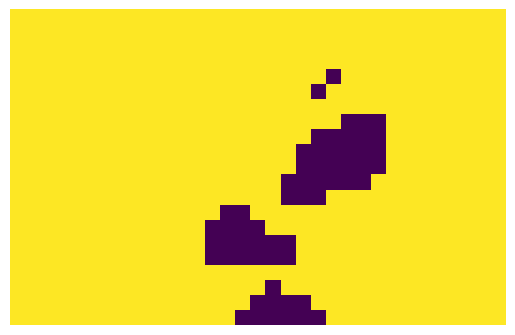

In [10]:
clustered_img = cluster_labels.reshape(top_half_img.shape[0],top_half_img.shape[1])
plt.imshow(clustered_img)
plt.axis('off')
plt.show();

#### Separating the Background from for ground

In [14]:
cluster_corners = [clustered_img[0,0],clustered_img[0,-1],clustered_img[-1,0],clustered_img[-1,-1]]
non_player = max(set(cluster_corners),key=cluster_corners.count)
print(non_player)

1


In [16]:
player = 1-non_player
print(player)

0


In [17]:
kmeans.cluster_centers_[player]

array([227.65      , 224.86666667, 182.33333333])

The above output shows the player T-shirt color